# Initialization

In [20]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)

from src.functions.plot_training_curve import plot_training_curve
from src.utils import init_notebook

In [2]:
init_notebook()

# Read model's results

In [3]:
model_results_folder = "data/model_results/cnn"

In [4]:
with open(
    f"{model_results_folder}/cnn_experiment_history_21-12-23.pkl", "rb"
) as pickle_file:
    model_history = pickle.load(pickle_file)

In [5]:
with open(
    f"{model_results_folder}/cnn_experiment_evaluate_21-12-23.pkl", "rb"
) as pickle_file:
    model_evaluate = pickle.load(pickle_file)

# Plot training curves

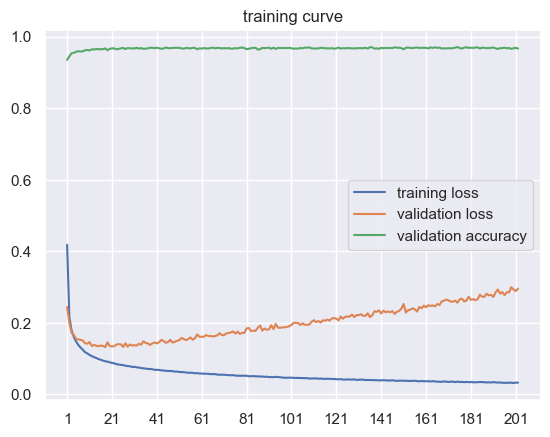

In [6]:
plot_training_curve(
    training_loss=model_history["loss"],
    validation_loss=model_history["val_loss"],
    validation_accuracy=model_history["val_accuracy"],
    plot_from_n_epoch=0,
    save_path=f"{model_results_folder}/training_curve.png",
)

In [7]:
print(f"categorical_crossentropy (loss) = {model_evaluate[0]}")
print(f"accuracy = {model_evaluate[1]}")

categorical_crossentropy (loss) = 0.0686769038438797
accuracy = 0.9871518015861511


# Confusion matrix
## Predict on test dataset

In [8]:
model = load_model(f"{model_results_folder}/cnn_experiment_21-12-23.h5")

In [9]:
full_test_dataset_path = "data/raw/test-dataset.csv"
sample_test_dataset_path = "data/raw/sample-test-dataset.csv"

In [10]:
# Open full test dataset if it exists locally, open sample test dataset otherwise

if os.path.exists(full_test_dataset_path):
    test_dataset = np.loadtxt(full_test_dataset_path, delimiter=",")
else:
    test_dataset = np.loadtxt(sample_test_dataset_path, delimiter=",")

In [11]:
y = test_dataset[:, 0]
X = test_dataset[:, 1:]

In [12]:
y_categorical = to_categorical(y)

In [13]:
y_pred = model.predict(X)

2907/2907 [==============================] - 12s 4ms/step


## Convert y_pred to orginal format

In [39]:
y_pred_convert = list(map(np.argmax, y_pred))
y_pred_convert = np.array(y_pred_convert)

In [40]:
letters = [chr(i) for i in range(ord("a"), ord("z") + 1)]

## Plot confusion matrix

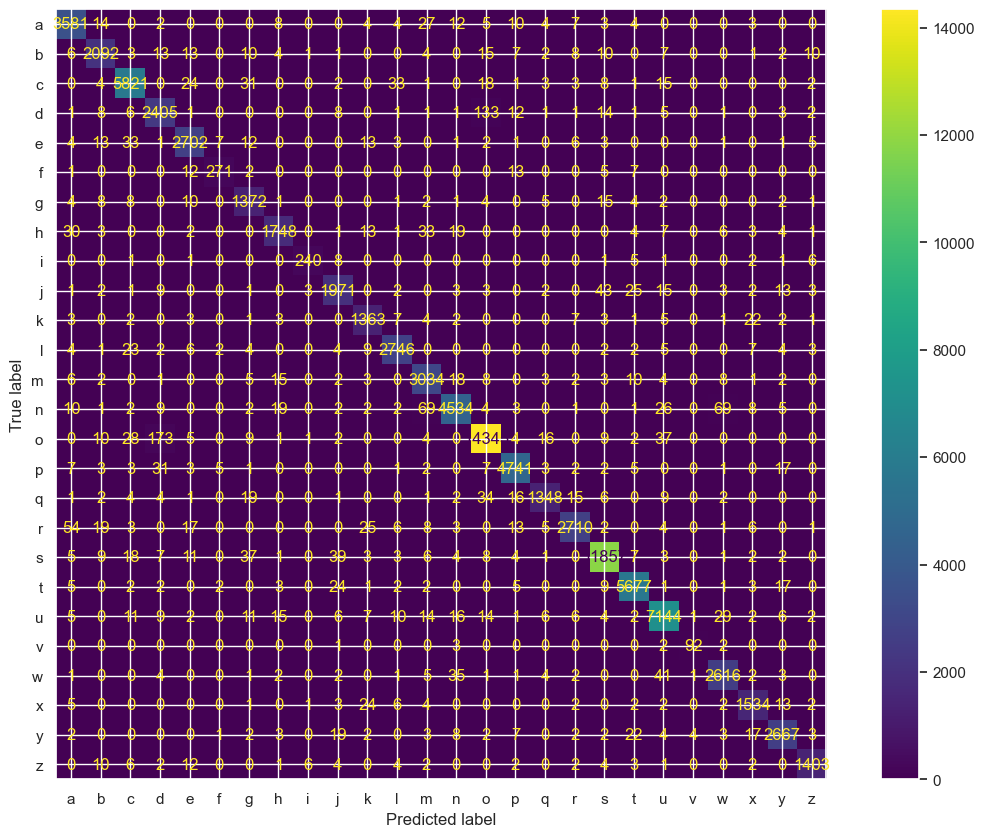

In [41]:
cm = confusion_matrix(y_true=y, y_pred=y_pred_convert)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=letters)

fig, ax = plt.subplots(figsize=(14, 10))
disp.plot(ax=ax)
plt.savefig(f"{model_results_folder}/confusion_matrix.png")
plt.show()

# Scores calculated on test dataset

In [42]:
f1 = f1_score(y, y_pred_convert, average='weighted')
accuracy = accuracy_score(y, y_pred_convert)
precision = precision_score(y, y_pred_convert, average='weighted')
recall = recall_score(y, y_pred_convert, average='weighted')

In [43]:
print(f"{f1 =}")
print(f"{accuracy =}")
print(f"{precision =}")
print(f"{recall =}")

f1 =0.9678085033395537
accuracy =0.9677884098484034
precision =0.9679548259525955
recall =0.9677884098484034
